In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
feature_correlation = pd.read_excel('../input/feature_correlation_matrix.xlsx')
feature_correlation.drop(['index','SK_ID_CURR'], axis = 1, inplace = True)
print (feature_correlation.shape)

(820, 818)


# heuristic algorithm : to find the subset of feature where each feature is highly similar to others. 

In [26]:
#----------------------------
# step1: find the pair of features whose has passed our threshold(加速後面挑features的速度)
#----------------------------

# setting
coeifficient_th = 0.9
highly_similar_feature_ls = []
pair_of_features = []
for ix, row in feature_correlation.head(n = 500).iterrows():
    hign_similarity = [i for i in row.tolist()  if i > coeifficient_th or i < -coeifficient_th ]
    hign_similarity = [i for i in hign_similarity if i != 1]
    hign_similarity = [i for i in hign_similarity if i != -1]
    if len(hign_similarity)!= 0:
        # find maximum absolute value of list
        max_similarity = max(hign_similarity, key=abs)
        highly_similar_feature = row[row == max_similarity].index[0]
        pair_of_features.append((ix,highly_similar_feature,))
        #print ('max_similarity',max_similarity)
        highly_similar_feature_ls.append(ix)
        highly_similar_feature_ls.append(highly_similar_feature)

highly_similar_feature_ls = list(set(highly_similar_feature_ls))
print ('num pair of highly similar feautures', len(highly_similar_feature_ls))
def pair_similarity(f1, f2):
    '''
    paras:
    f1:str
    f2:str
    '''
    return feature_correlation.iloc[(feature_correlation.index == f1)][[f2]].iloc[0][0]

#----------------------------
# step3: how many base features we can impute
#----------------------------
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
print (df.shape)
copy_for_the_following_merge = df[['SK_ID_CURR','TARGET']].copy()
no_need_to_inpute = ['index','SK_ID_CURR']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print (df.shape)

# setting
for i in np.arange(0.02, 0.01, step = - 0.01):
    ratio_that_similar_to_all_feautres = i
    print ('ratio_that_similar_to_all_feautres', ratio_that_similar_to_all_feautres)
    #----------------------------
    # step2: find the subset of features overpass the theeshold with all features from pair of features set
    #----------------------------
    output_features = []
    for e_f in highly_similar_feature_ls:
        check_if_all_features_are_similar = [1.0 if abs(pair_similarity(e_f, e_f1)) > coeifficient_th else 0 for e_f1 in highly_similar_feature_ls ]
        num_features_the_feautre_correlate_w_others = int(len(check_if_all_features_are_similar) * ratio_that_similar_to_all_feautres)
        if check_if_all_features_are_similar.count(1.0) > num_features_the_feautre_correlate_w_others:
            print (e_f)
            output_features.append(e_f)
    print ('num_features_will_be_impute', len(output_features))
    base_feature_worth_imputing_set = set(df.columns.tolist()) & set(output_features)
    print ('num_base_feature_worth_imputing_set',len(base_feature_worth_imputing_set))
    break
    

num pair of highly similar feautures 165
(356251, 281)
(356251, 279)
ratio_that_similar_to_all_feautres 0.02
LIVINGAREA_MODE
LIVINGAPARTMENTS_MEDI
LIVINGAREA_AVG
ACTIVE_AMT_CREDIT_SUM_DEBT_SUM
BURO_DAYS_CREDIT_MIN
CLOSED_MONTHS_BALANCE_MIN_MIN
LIVINGAREA_MEDI
BURO_AMT_CREDIT_SUM_DEBT_SUM
APARTMENTS_AVG
BURO_AMT_CREDIT_SUM_DEBT_MAX
APARTMENTS_MODE
ACTIVE_AMT_CREDIT_SUM_DEBT_MAX
CLOSED_DAYS_CREDIT_MIN
LIVINGAPARTMENTS_MODE
BURO_MONTHS_BALANCE_MIN_MIN
LIVINGAPARTMENTS_AVG
APARTMENTS_MEDI
num_features_will_be_impute 17
num_base_feature_worth_imputing_set 5


In [30]:
test = feature_correlation[list(base_feature_worth_imputing_set)]
test[test.index.isin(list(base_feature_worth_imputing_set))]

,BURO_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,LIVINGAREA_MEDI,APARTMENTS_MEDI
APARTMENTS_MEDI,0.041287,0.045607,0.049347,0.915137,1.000000
LIVINGAREA_MEDI,0.048411,0.053719,0.056836,1.000000,0.915137
BURO_AMT_CREDIT_SUM_DEBT_SUM,1.000000,0.994743,0.950061,0.048411,0.041287
ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,0.950061,0.954162,1.000000,0.056836,0.049347
ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,0.994743,1.000000,0.954162,0.053719,0.045607


In [12]:
msno.bar()

(36, 160)

# loading original_raw_featurs

In [13]:
original_raw_featurs = pd.read_hdf('../features/original_raw_featurs.h5','original_raw_featurs')
print (original_raw_featurs.shape)

(356251, 820)


In [28]:
original_raw_featurs[list(base_feature_worth_imputing_set)]

,BURO_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,LIVINGAREA_MEDI,APARTMENTS_MEDI
0,245781.000,245781.000,245781.000,0.0193,0.0250
1,0.000,0.000,0.000,0.0558,0.0968
2,0.000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,0.000,NaN,NaN,NaN,NaN
5,240057.000,240057.000,240057.000,NaN,NaN
6,1077349.500,1077349.500,557959.500,NaN,NaN
7,348007.500,348007.500,348007.500,NaN,NaN
8,0.000,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


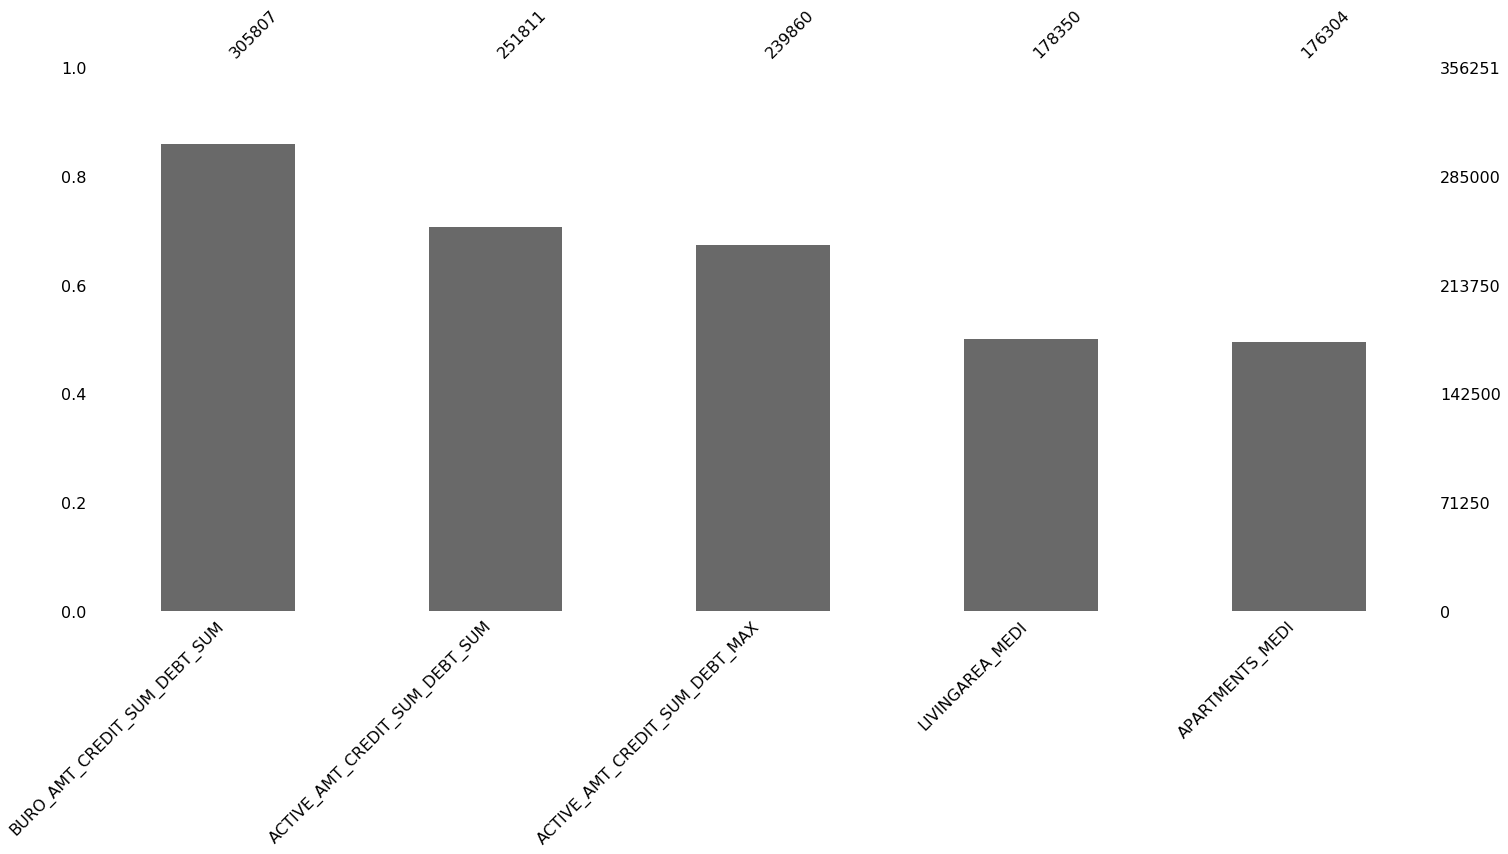

In [29]:
msno.bar(original_raw_featurs[list(base_feature_worth_imputing_set)])

In [15]:
'TARGET' in original_raw_featurs[output_features].columns.tolist(), 'SK_ID_CURR' in original_raw_featurs[output_features].columns.tolist()

(False, False)

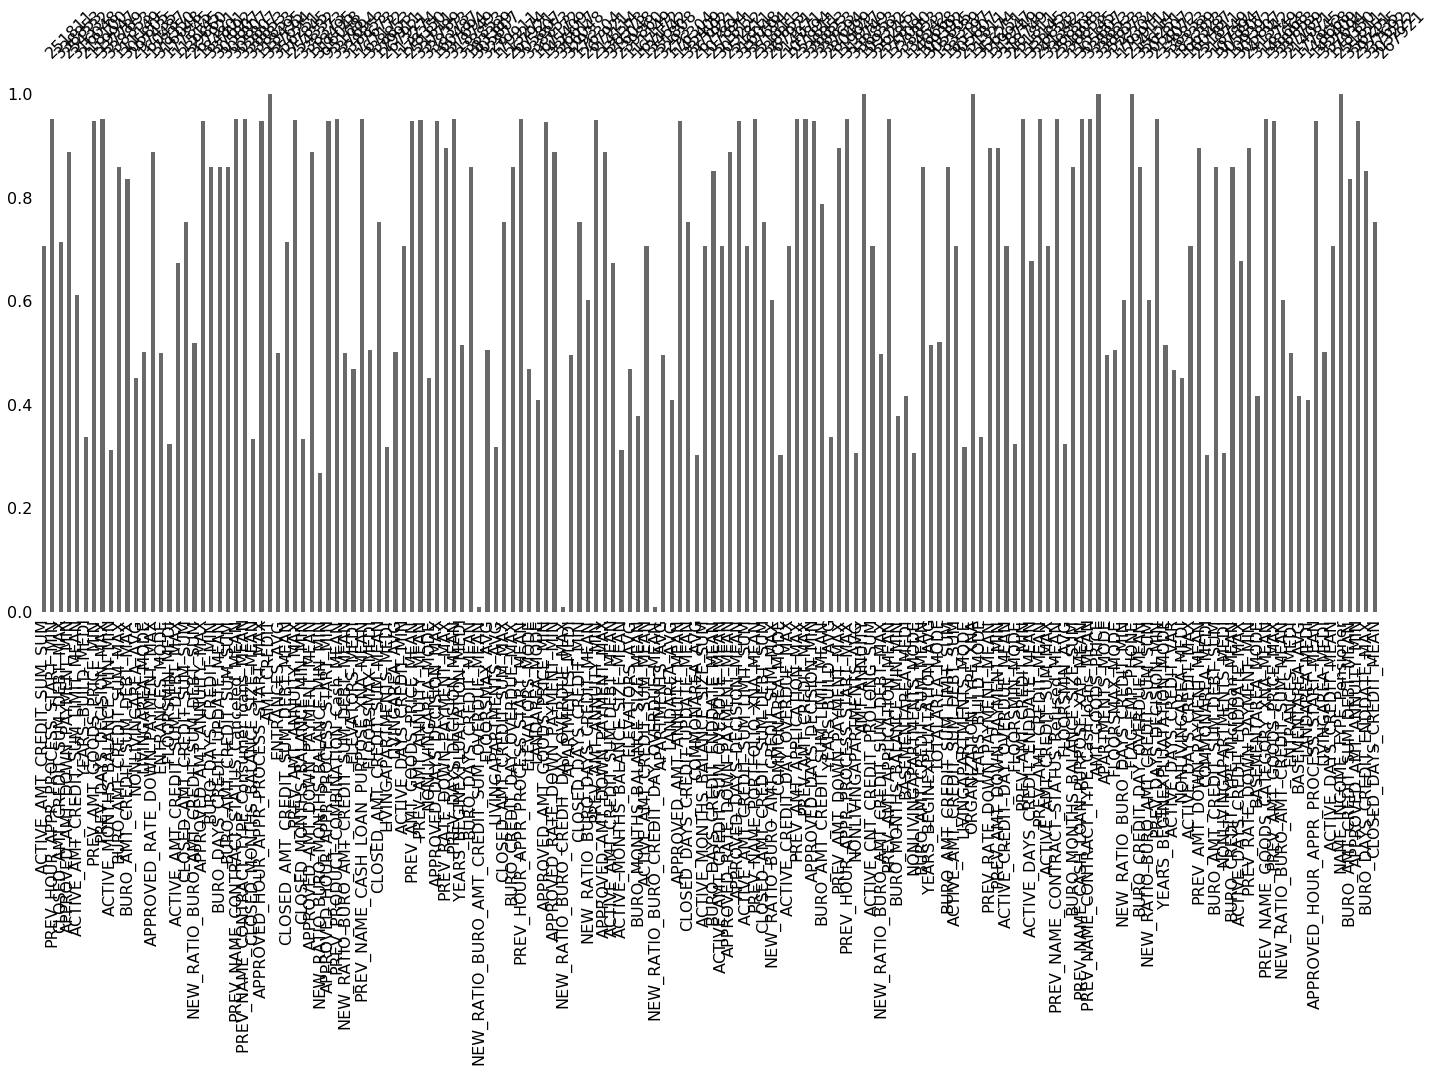

In [14]:
msno.bar(original_raw_featurs[output_features])

# knn
# use original_raw_features to impute

In [17]:
original_raw_featurs[list(output_features)].head()

,ACTIVE_AMT_CREDIT_SUM_SUM,PREV_HOUR_APPR_PROCESS_START_MIN,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,APPROVED_AMT_DOWN_PAYMENT_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,YEARS_BUILD_MEDI,PREV_AMT_GOODS_PRICE_MIN,PREV_DAYS_DECISION_MAX,ACTIVE_MONTHS_BALANCE_MIN_MIN,BURO_AMT_CREDIT_SUM_MAX,...,BASEMENTAREA_AVG,LANDAREA_MEDI,APPROVED_HOUR_APPR_PROCESS_START_MEAN,LIVINGAREA_MEDI,ACTIVE_DAYS_CREDIT_MEAN,NAME_INCOME_TYPE_Pensioner,BURO_AMT_CREDIT_SUM_DEBT_MEAN,APPROVED_AMT_ANNUITY_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_MEAN
0,481988.565,9.0,0.0,0.00,15994.2825,0.6243,179055.00,-606.0,-34.0,450000.0,...,0.0369,0.0375,9.000000,0.0193,-572.5,0,49156.2,9251.775,780.0,-974.500000
1,810000.000,12.0,0.0,0.00,810000.0000,0.7987,68809.50,-746.0,NaN,810000.0,...,0.0529,0.0132,14.666667,0.0558,-606.0,0,0.0,6737.310,1216.0,-1665.666667
2,NaN,5.0,0.0,4860.00,NaN,NaN,24282.00,-815.0,NaN,94537.8,...,NaN,NaN,5.000000,NaN,NaN,0,0.0,5357.250,-382.0,-867.000000
3,NaN,12.0,NaN,2693.34,NaN,NaN,26912.34,-181.0,NaN,NaN,...,NaN,NaN,14.400000,NaN,NaN,0,NaN,2482.920,NaN,NaN
4,NaN,8.0,0.0,3105.00,NaN,NaN,17176.50,-374.0,NaN,146250.0,...,NaN,NaN,12.333333,NaN,NaN,0,0.0,1834.290,-783.0,-1149.000000


In [18]:
# feature scaling before KNN
X_missing_df = original_raw_featurs[list(output_features)]
print (X_missing_df.shape)
# feature scaling
for f in X_missing_df.columns.tolist():
    mean = X_missing_df[f].mean()
    std = X_missing_df[f].std()
    X_missing_df[f] = (X_missing_df[f] - mean) / std
print (X_missing_df.shape)
X_missing_df.head()

(356251, 160)


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(356251, 160)


,ACTIVE_AMT_CREDIT_SUM_SUM,PREV_HOUR_APPR_PROCESS_START_MIN,CLOSED_AMT_CREDIT_SUM_DEBT_MAX,APPROVED_AMT_DOWN_PAYMENT_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,YEARS_BUILD_MEDI,PREV_AMT_GOODS_PRICE_MIN,PREV_DAYS_DECISION_MAX,ACTIVE_MONTHS_BALANCE_MIN_MIN,BURO_AMT_CREDIT_SUM_MAX,...,BASEMENTAREA_AVG,LANDAREA_MEDI,APPROVED_HOUR_APPR_PROCESS_START_MEAN,LIVINGAREA_MEDI,ACTIVE_DAYS_CREDIT_MEAN,NAME_INCOME_TYPE_Pensioner,BURO_AMT_CREDIT_SUM_DEBT_MEAN,APPROVED_AMT_ANNUITY_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,CLOSED_DAYS_CREDIT_MEAN
0,-0.361393,-0.558429,-0.058554,-0.277667,0.058964,-1.171268,0.893897,-0.231889,-0.184332,-0.233774,...,-0.628976,-0.362189,-1.309353,-0.797123,0.164610,-0.47079,-0.209546,0.116470,-0.395710,0.679752
1,-0.222323,0.410178,-0.058554,-0.277667,15.073300,0.385087,-0.100960,-0.492631,NaN,-0.078431,...,-0.434596,-0.657569,0.664070,-0.473775,0.096353,-0.47079,-0.301123,-0.196607,-0.349439,-0.479823
2,NaN,-1.849906,-0.058554,0.025155,NaN,NaN,-0.502777,-0.621140,NaN,-0.387158,...,NaN,NaN,-2.702357,NaN,NaN,-0.47079,-0.301123,-0.368439,-0.519029,0.860105
3,NaN,0.410178,NaN,-0.109848,NaN,NaN,-0.479041,0.559651,NaN,NaN,...,NaN,NaN,0.571203,NaN,NaN,-0.47079,NaN,-0.726322,NaN,NaN
4,NaN,-0.881298,-0.058554,-0.084198,NaN,NaN,-0.566898,0.200199,NaN,-0.364844,...,NaN,NaN,-0.148516,NaN,NaN,-0.47079,-0.301123,-0.807084,-0.561585,0.386992


In [19]:
from ycimpute.imputer.knnimput import KNN # inputation library
k = 65

small_df_ls = []
num_split = 20
previous_step = None
for i, step in enumerate(np.arange(0, X_missing_df.shape[0], step = int(X_missing_df.shape[0] / num_split))):
    # for memory problem, we cannot feed all the data points into algorithm, which depends on row and n_features
    if i == 0:
        pass
    elif i == 1:
        small_df_ls.append(X_missing_df[0: step])
        previous_step = step
    elif i == (num_split):
        small_df_ls.append(X_missing_df[previous_step: ])
        break
    else:
        small_df_ls.append(X_missing_df[previous_step: step])
        previous_step = step
pd.concat(small_df_ls, axis = 0).shape

(356251, 160)

In [20]:
#-------------------
# imputating
#------------------
k = 65 # by cv
small_df_filled_ls = []
for small_df in small_df_ls:
    X_missing = small_df.copy()
    print (X_missing.shape)
    # core algorithm: input should be array
    X_filled = KNN(k = k).complete(X_missing.values)
    small_df_filled_ls.append(pd.DataFrame(X_filled, columns = X_missing.columns))

(17812, 160)
Imputing row 1/17812 with 10 missing, elapsed time: 434.569
Imputing row 101/17812 with 59 missing, elapsed time: 435.216
Imputing row 201/17812 with 16 missing, elapsed time: 435.767
Imputing row 301/17812 with 85 missing, elapsed time: 436.319
Imputing row 401/17812 with 60 missing, elapsed time: 436.937
Imputing row 501/17812 with 28 missing, elapsed time: 437.588
Imputing row 601/17812 with 60 missing, elapsed time: 438.180
Imputing row 701/17812 with 37 missing, elapsed time: 438.787
Imputing row 801/17812 with 38 missing, elapsed time: 439.425
Imputing row 901/17812 with 38 missing, elapsed time: 440.044
Imputing row 1001/17812 with 80 missing, elapsed time: 440.646
Imputing row 1101/17812 with 48 missing, elapsed time: 441.258
Imputing row 1201/17812 with 59 missing, elapsed time: 441.875
Imputing row 1301/17812 with 13 missing, elapsed time: 442.529
Imputing row 1401/17812 with 37 missing, elapsed time: 443.114
Imputing row 1501/17812 with 27 missing, elapsed time:

Imputing row 13001/17812 with 60 missing, elapsed time: 513.444
Imputing row 13101/17812 with 59 missing, elapsed time: 514.059
Imputing row 13201/17812 with 76 missing, elapsed time: 514.711
Imputing row 13301/17812 with 55 missing, elapsed time: 515.316
Imputing row 13401/17812 with 60 missing, elapsed time: 515.979
Imputing row 13501/17812 with 16 missing, elapsed time: 516.642
Imputing row 13601/17812 with 59 missing, elapsed time: 517.217
Imputing row 13701/17812 with 54 missing, elapsed time: 517.782
Imputing row 13801/17812 with 55 missing, elapsed time: 518.374
Imputing row 13901/17812 with 84 missing, elapsed time: 518.980
Imputing row 14001/17812 with 154 missing, elapsed time: 519.599
Imputing row 14101/17812 with 59 missing, elapsed time: 520.231
Imputing row 14201/17812 with 10 missing, elapsed time: 520.846
Imputing row 14301/17812 with 56 missing, elapsed time: 521.466
Imputing row 14401/17812 with 53 missing, elapsed time: 522.017
Imputing row 14501/17812 with 52 missin

Imputing row 7901/17812 with 17 missing, elapsed time: 480.737
Imputing row 8001/17812 with 59 missing, elapsed time: 481.290
Imputing row 8101/17812 with 16 missing, elapsed time: 481.953
Imputing row 8201/17812 with 38 missing, elapsed time: 482.523
Imputing row 8301/17812 with 59 missing, elapsed time: 483.123
Imputing row 8401/17812 with 58 missing, elapsed time: 483.689
Imputing row 8501/17812 with 68 missing, elapsed time: 484.254
Imputing row 8601/17812 with 53 missing, elapsed time: 484.877
Imputing row 8701/17812 with 74 missing, elapsed time: 485.466
Imputing row 8801/17812 with 13 missing, elapsed time: 486.116
Imputing row 8901/17812 with 10 missing, elapsed time: 486.735
Imputing row 9001/17812 with 46 missing, elapsed time: 487.355
Imputing row 9101/17812 with 41 missing, elapsed time: 487.952
Imputing row 9201/17812 with 10 missing, elapsed time: 488.548
Imputing row 9301/17812 with 106 missing, elapsed time: 489.119
Imputing row 9401/17812 with 53 missing, elapsed time:

Imputing row 2801/17812 with 103 missing, elapsed time: 453.563
Imputing row 2901/17812 with 82 missing, elapsed time: 454.173
Imputing row 3001/17812 with 54 missing, elapsed time: 454.721
Imputing row 3101/17812 with 59 missing, elapsed time: 455.360
Imputing row 3201/17812 with 65 missing, elapsed time: 455.988
Imputing row 3301/17812 with 111 missing, elapsed time: 456.606
Imputing row 3401/17812 with 44 missing, elapsed time: 457.217
Imputing row 3501/17812 with 80 missing, elapsed time: 457.795
Imputing row 3601/17812 with 11 missing, elapsed time: 458.405
Imputing row 3701/17812 with 37 missing, elapsed time: 458.935
Imputing row 3801/17812 with 71 missing, elapsed time: 459.510
Imputing row 3901/17812 with 59 missing, elapsed time: 460.107
Imputing row 4001/17812 with 76 missing, elapsed time: 460.732
Imputing row 4101/17812 with 59 missing, elapsed time: 461.332
Imputing row 4201/17812 with 57 missing, elapsed time: 461.975
Imputing row 4301/17812 with 71 missing, elapsed time

Imputing row 15701/17812 with 59 missing, elapsed time: 531.990
Imputing row 15801/17812 with 37 missing, elapsed time: 532.588
Imputing row 15901/17812 with 80 missing, elapsed time: 533.176
Imputing row 16001/17812 with 59 missing, elapsed time: 533.814
Imputing row 16101/17812 with 19 missing, elapsed time: 534.376
Imputing row 16201/17812 with 118 missing, elapsed time: 535.017
Imputing row 16301/17812 with 85 missing, elapsed time: 535.611
Imputing row 16401/17812 with 55 missing, elapsed time: 536.210
Imputing row 16501/17812 with 63 missing, elapsed time: 536.881
Imputing row 16601/17812 with 52 missing, elapsed time: 537.519
Imputing row 16701/17812 with 63 missing, elapsed time: 538.099
Imputing row 16801/17812 with 32 missing, elapsed time: 538.714
Imputing row 16901/17812 with 37 missing, elapsed time: 539.303
Imputing row 17001/17812 with 106 missing, elapsed time: 539.955
Imputing row 17101/17812 with 118 missing, elapsed time: 540.584
Imputing row 17201/17812 with 10 miss

Imputing row 10701/17812 with 72 missing, elapsed time: 499.223
Imputing row 10801/17812 with 10 missing, elapsed time: 499.844
Imputing row 10901/17812 with 37 missing, elapsed time: 500.422
Imputing row 11001/17812 with 59 missing, elapsed time: 501.052
Imputing row 11101/17812 with 99 missing, elapsed time: 501.634
Imputing row 11201/17812 with 33 missing, elapsed time: 502.227
Imputing row 11301/17812 with 59 missing, elapsed time: 502.826
Imputing row 11401/17812 with 16 missing, elapsed time: 503.427
Imputing row 11501/17812 with 106 missing, elapsed time: 504.001
Imputing row 11601/17812 with 80 missing, elapsed time: 504.609
Imputing row 11701/17812 with 96 missing, elapsed time: 505.281
Imputing row 11801/17812 with 41 missing, elapsed time: 505.920
Imputing row 11901/17812 with 105 missing, elapsed time: 506.540
Imputing row 12001/17812 with 10 missing, elapsed time: 507.166
Imputing row 12101/17812 with 59 missing, elapsed time: 507.724
Imputing row 12201/17812 with 60 missi

Imputing row 5601/17812 with 22 missing, elapsed time: 467.168
Imputing row 5701/17812 with 60 missing, elapsed time: 467.723
Imputing row 5801/17812 with 106 missing, elapsed time: 468.333
Imputing row 5901/17812 with 96 missing, elapsed time: 468.929
Imputing row 6001/17812 with 50 missing, elapsed time: 469.511
Imputing row 6101/17812 with 16 missing, elapsed time: 470.139
Imputing row 6201/17812 with 66 missing, elapsed time: 470.725
Imputing row 6301/17812 with 53 missing, elapsed time: 471.307
Imputing row 6401/17812 with 65 missing, elapsed time: 471.939
Imputing row 6501/17812 with 35 missing, elapsed time: 472.559
Imputing row 6601/17812 with 31 missing, elapsed time: 473.112
Imputing row 6701/17812 with 80 missing, elapsed time: 473.727
Imputing row 6801/17812 with 14 missing, elapsed time: 474.315
Imputing row 6901/17812 with 32 missing, elapsed time: 474.929
Imputing row 7001/17812 with 54 missing, elapsed time: 475.556
Imputing row 7101/17812 with 53 missing, elapsed time:

Imputing row 501/17812 with 59 missing, elapsed time: 441.749
Imputing row 601/17812 with 57 missing, elapsed time: 442.395
Imputing row 701/17812 with 60 missing, elapsed time: 442.980
Imputing row 801/17812 with 59 missing, elapsed time: 443.571
Imputing row 901/17812 with 34 missing, elapsed time: 444.164
Imputing row 1001/17812 with 19 missing, elapsed time: 444.774
Imputing row 1101/17812 with 70 missing, elapsed time: 445.378
Imputing row 1201/17812 with 41 missing, elapsed time: 445.960
Imputing row 1301/17812 with 37 missing, elapsed time: 446.589
Imputing row 1401/17812 with 80 missing, elapsed time: 447.194
Imputing row 1501/17812 with 60 missing, elapsed time: 447.732
Imputing row 1601/17812 with 75 missing, elapsed time: 448.366
Imputing row 1701/17812 with 19 missing, elapsed time: 449.028
Imputing row 1801/17812 with 73 missing, elapsed time: 449.587
Imputing row 1901/17812 with 61 missing, elapsed time: 450.192
Imputing row 2001/17812 with 43 missing, elapsed time: 450.7

Imputing row 13501/17812 with 78 missing, elapsed time: 520.943
Imputing row 13601/17812 with 19 missing, elapsed time: 521.560
Imputing row 13701/17812 with 36 missing, elapsed time: 522.105
Imputing row 13801/17812 with 31 missing, elapsed time: 522.743
Imputing row 13901/17812 with 64 missing, elapsed time: 523.355
Imputing row 14001/17812 with 62 missing, elapsed time: 523.950
Imputing row 14101/17812 with 63 missing, elapsed time: 524.581
Imputing row 14201/17812 with 61 missing, elapsed time: 525.229
Imputing row 14301/17812 with 37 missing, elapsed time: 525.899
Imputing row 14401/17812 with 60 missing, elapsed time: 526.536
Imputing row 14501/17812 with 33 missing, elapsed time: 527.153
Imputing row 14601/17812 with 17 missing, elapsed time: 527.783
Imputing row 14701/17812 with 32 missing, elapsed time: 528.339
Imputing row 14801/17812 with 28 missing, elapsed time: 528.938
Imputing row 14901/17812 with 106 missing, elapsed time: 529.551
Imputing row 15001/17812 with 40 missin

Imputing row 8401/17812 with 109 missing, elapsed time: 489.157
Imputing row 8501/17812 with 73 missing, elapsed time: 489.756
Imputing row 8601/17812 with 52 missing, elapsed time: 490.349
Imputing row 8701/17812 with 10 missing, elapsed time: 491.043
Imputing row 8801/17812 with 48 missing, elapsed time: 491.647
Imputing row 8901/17812 with 36 missing, elapsed time: 492.261
Imputing row 9001/17812 with 48 missing, elapsed time: 492.915
Imputing row 9101/17812 with 71 missing, elapsed time: 493.525
Imputing row 9201/17812 with 31 missing, elapsed time: 494.104
Imputing row 9301/17812 with 59 missing, elapsed time: 494.729
Imputing row 9401/17812 with 53 missing, elapsed time: 495.344
Imputing row 9501/17812 with 53 missing, elapsed time: 495.908
Imputing row 9601/17812 with 59 missing, elapsed time: 496.520
Imputing row 9701/17812 with 17 missing, elapsed time: 497.173
Imputing row 9801/17812 with 96 missing, elapsed time: 497.785
Imputing row 9901/17812 with 37 missing, elapsed time:

Imputing row 3301/17812 with 20 missing, elapsed time: 456.707
Imputing row 3401/17812 with 76 missing, elapsed time: 457.281
Imputing row 3501/17812 with 31 missing, elapsed time: 457.832
Imputing row 3601/17812 with 55 missing, elapsed time: 458.444
Imputing row 3701/17812 with 76 missing, elapsed time: 459.069
Imputing row 3801/17812 with 106 missing, elapsed time: 459.699
Imputing row 3901/17812 with 106 missing, elapsed time: 460.346
Imputing row 4001/17812 with 18 missing, elapsed time: 460.954
Imputing row 4101/17812 with 53 missing, elapsed time: 461.505
Imputing row 4201/17812 with 73 missing, elapsed time: 462.086
Imputing row 4301/17812 with 61 missing, elapsed time: 462.613
Imputing row 4401/17812 with 54 missing, elapsed time: 463.205
Imputing row 4501/17812 with 37 missing, elapsed time: 463.763
Imputing row 4601/17812 with 63 missing, elapsed time: 464.380
Imputing row 4701/17812 with 38 missing, elapsed time: 465.037
Imputing row 4801/17812 with 40 missing, elapsed time

Imputing row 16201/17812 with 76 missing, elapsed time: 535.512
Imputing row 16301/17812 with 63 missing, elapsed time: 536.120
Imputing row 16401/17812 with 11 missing, elapsed time: 536.743
Imputing row 16501/17812 with 19 missing, elapsed time: 537.368
Imputing row 16601/17812 with 53 missing, elapsed time: 537.942
Imputing row 16701/17812 with 29 missing, elapsed time: 538.593
Imputing row 16801/17812 with 110 missing, elapsed time: 539.219
Imputing row 16901/17812 with 53 missing, elapsed time: 539.863
Imputing row 17001/17812 with 59 missing, elapsed time: 540.447
Imputing row 17101/17812 with 80 missing, elapsed time: 541.092
Imputing row 17201/17812 with 84 missing, elapsed time: 541.698
Imputing row 17301/17812 with 54 missing, elapsed time: 542.306
Imputing row 17401/17812 with 59 missing, elapsed time: 542.898
Imputing row 17501/17812 with 22 missing, elapsed time: 543.529
Imputing row 17601/17812 with 80 missing, elapsed time: 544.151
Imputing row 17701/17812 with 16 missin

Imputing row 11201/17812 with 72 missing, elapsed time: 504.250
Imputing row 11301/17812 with 23 missing, elapsed time: 504.818
Imputing row 11401/17812 with 71 missing, elapsed time: 505.445
Imputing row 11501/17812 with 10 missing, elapsed time: 506.076
Imputing row 11601/17812 with 19 missing, elapsed time: 506.639
Imputing row 11701/17812 with 49 missing, elapsed time: 507.208
Imputing row 11801/17812 with 51 missing, elapsed time: 507.771
Imputing row 11901/17812 with 83 missing, elapsed time: 508.342
Imputing row 12001/17812 with 111 missing, elapsed time: 508.913
Imputing row 12101/17812 with 62 missing, elapsed time: 509.515
Imputing row 12201/17812 with 34 missing, elapsed time: 510.117
Imputing row 12301/17812 with 16 missing, elapsed time: 510.710
Imputing row 12401/17812 with 17 missing, elapsed time: 511.315
Imputing row 12501/17812 with 63 missing, elapsed time: 511.905
Imputing row 12601/17812 with 63 missing, elapsed time: 512.462
Imputing row 12701/17812 with 128 missi

Imputing row 6101/17812 with 63 missing, elapsed time: 476.707
Imputing row 6201/17812 with 31 missing, elapsed time: 477.341
Imputing row 6301/17812 with 59 missing, elapsed time: 477.960
Imputing row 6401/17812 with 63 missing, elapsed time: 478.604
Imputing row 6501/17812 with 54 missing, elapsed time: 479.226
Imputing row 6601/17812 with 54 missing, elapsed time: 479.866
Imputing row 6701/17812 with 17 missing, elapsed time: 480.506
Imputing row 6801/17812 with 60 missing, elapsed time: 481.154
Imputing row 6901/17812 with 59 missing, elapsed time: 481.783
Imputing row 7001/17812 with 55 missing, elapsed time: 482.448
Imputing row 7101/17812 with 147 missing, elapsed time: 483.031
Imputing row 7201/17812 with 55 missing, elapsed time: 483.602
Imputing row 7301/17812 with 71 missing, elapsed time: 484.180
Imputing row 7401/17812 with 61 missing, elapsed time: 484.818
Imputing row 7501/17812 with 75 missing, elapsed time: 485.466
Imputing row 7601/17812 with 44 missing, elapsed time:

Imputing row 1001/17812 with 71 missing, elapsed time: 447.579
Imputing row 1101/17812 with 80 missing, elapsed time: 448.254
Imputing row 1201/17812 with 53 missing, elapsed time: 448.890
Imputing row 1301/17812 with 80 missing, elapsed time: 449.560
Imputing row 1401/17812 with 55 missing, elapsed time: 450.208
Imputing row 1501/17812 with 37 missing, elapsed time: 450.838
Imputing row 1601/17812 with 53 missing, elapsed time: 451.480
Imputing row 1701/17812 with 53 missing, elapsed time: 452.119
Imputing row 1801/17812 with 59 missing, elapsed time: 452.803
Imputing row 1901/17812 with 60 missing, elapsed time: 453.571
Imputing row 2001/17812 with 17 missing, elapsed time: 454.217
Imputing row 2101/17812 with 53 missing, elapsed time: 454.843
Imputing row 2201/17812 with 48 missing, elapsed time: 455.498
Imputing row 2301/17812 with 88 missing, elapsed time: 456.112
Imputing row 2401/17812 with 13 missing, elapsed time: 456.724
Imputing row 2501/17812 with 61 missing, elapsed time: 

Imputing row 14001/17812 with 34 missing, elapsed time: 531.847
Imputing row 14101/17812 with 59 missing, elapsed time: 532.391
Imputing row 14201/17812 with 10 missing, elapsed time: 533.203
Imputing row 14301/17812 with 25 missing, elapsed time: 533.840
Imputing row 14401/17812 with 59 missing, elapsed time: 534.440
Imputing row 14501/17812 with 92 missing, elapsed time: 535.018
Imputing row 14601/17812 with 16 missing, elapsed time: 535.699
Imputing row 14701/17812 with 35 missing, elapsed time: 536.318
Imputing row 14801/17812 with 14 missing, elapsed time: 536.968
Imputing row 14901/17812 with 66 missing, elapsed time: 537.619
Imputing row 15001/17812 with 16 missing, elapsed time: 538.254
Imputing row 15101/17812 with 19 missing, elapsed time: 538.885
Imputing row 15201/17812 with 80 missing, elapsed time: 539.560
Imputing row 15301/17812 with 36 missing, elapsed time: 540.219
Imputing row 15401/17812 with 99 missing, elapsed time: 540.913
Imputing row 15501/17812 with 87 missing

Imputing row 8901/17812 with 63 missing, elapsed time: 494.833
Imputing row 9001/17812 with 22 missing, elapsed time: 495.469
Imputing row 9101/17812 with 71 missing, elapsed time: 496.051
Imputing row 9201/17812 with 16 missing, elapsed time: 496.653
Imputing row 9301/17812 with 53 missing, elapsed time: 497.341
Imputing row 9401/17812 with 16 missing, elapsed time: 498.003
Imputing row 9501/17812 with 106 missing, elapsed time: 498.583
Imputing row 9601/17812 with 59 missing, elapsed time: 499.238
Imputing row 9701/17812 with 55 missing, elapsed time: 499.944
Imputing row 9801/17812 with 16 missing, elapsed time: 500.535
Imputing row 9901/17812 with 76 missing, elapsed time: 501.107
Imputing row 10001/17812 with 19 missing, elapsed time: 501.819
Imputing row 10101/17812 with 16 missing, elapsed time: 502.420
Imputing row 10201/17812 with 53 missing, elapsed time: 502.983
Imputing row 10301/17812 with 106 missing, elapsed time: 503.612
Imputing row 10401/17812 with 31 missing, elapsed

Imputing row 3801/17812 with 16 missing, elapsed time: 456.654
Imputing row 3901/17812 with 59 missing, elapsed time: 457.304
Imputing row 4001/17812 with 59 missing, elapsed time: 457.946
Imputing row 4101/17812 with 80 missing, elapsed time: 458.507
Imputing row 4201/17812 with 61 missing, elapsed time: 459.088
Imputing row 4301/17812 with 59 missing, elapsed time: 459.695
Imputing row 4401/17812 with 53 missing, elapsed time: 460.291
Imputing row 4501/17812 with 38 missing, elapsed time: 460.889
Imputing row 4601/17812 with 27 missing, elapsed time: 461.482
Imputing row 4701/17812 with 10 missing, elapsed time: 462.159
Imputing row 4801/17812 with 19 missing, elapsed time: 462.730
Imputing row 4901/17812 with 53 missing, elapsed time: 463.292
Imputing row 5001/17812 with 59 missing, elapsed time: 463.954
Imputing row 5101/17812 with 61 missing, elapsed time: 464.561
Imputing row 5201/17812 with 106 missing, elapsed time: 465.132
Imputing row 5301/17812 with 63 missing, elapsed time:

Imputing row 16701/17812 with 118 missing, elapsed time: 534.934
Imputing row 16801/17812 with 60 missing, elapsed time: 535.559
Imputing row 16901/17812 with 53 missing, elapsed time: 536.194
Imputing row 17001/17812 with 80 missing, elapsed time: 536.748
Imputing row 17101/17812 with 37 missing, elapsed time: 537.399
Imputing row 17201/17812 with 85 missing, elapsed time: 538.003
Imputing row 17301/17812 with 63 missing, elapsed time: 538.664
Imputing row 17401/17812 with 59 missing, elapsed time: 539.288
Imputing row 17501/17812 with 60 missing, elapsed time: 539.934
Imputing row 17601/17812 with 16 missing, elapsed time: 540.586
Imputing row 17701/17812 with 59 missing, elapsed time: 541.264
Imputing row 17801/17812 with 62 missing, elapsed time: 541.881
[KNN] Warning: 178120/2849920 still missing after imputation, replacing with 0
(17812, 160)
Imputing row 1/17812 with 60 missing, elapsed time: 433.687
Imputing row 101/17812 with 80 missing, elapsed time: 434.315
Imputing row 201/

Imputing row 11701/17812 with 59 missing, elapsed time: 504.640
Imputing row 11801/17812 with 61 missing, elapsed time: 505.242
Imputing row 11901/17812 with 63 missing, elapsed time: 505.880
Imputing row 12001/17812 with 20 missing, elapsed time: 506.495
Imputing row 12101/17812 with 106 missing, elapsed time: 507.127
Imputing row 12201/17812 with 27 missing, elapsed time: 507.688
Imputing row 12301/17812 with 76 missing, elapsed time: 508.300
Imputing row 12401/17812 with 53 missing, elapsed time: 508.870
Imputing row 12501/17812 with 53 missing, elapsed time: 509.404
Imputing row 12601/17812 with 66 missing, elapsed time: 509.980
Imputing row 12701/17812 with 59 missing, elapsed time: 510.492
Imputing row 12801/17812 with 38 missing, elapsed time: 511.082
Imputing row 12901/17812 with 59 missing, elapsed time: 511.712
Imputing row 13001/17812 with 81 missing, elapsed time: 512.327
Imputing row 13101/17812 with 90 missing, elapsed time: 512.904
Imputing row 13201/17812 with 31 missin

Imputing row 6601/17812 with 60 missing, elapsed time: 474.356
Imputing row 6701/17812 with 67 missing, elapsed time: 475.023
Imputing row 6801/17812 with 90 missing, elapsed time: 475.602
Imputing row 6901/17812 with 47 missing, elapsed time: 476.221
Imputing row 7001/17812 with 56 missing, elapsed time: 476.779
Imputing row 7101/17812 with 11 missing, elapsed time: 477.323
Imputing row 7201/17812 with 75 missing, elapsed time: 477.963
Imputing row 7301/17812 with 16 missing, elapsed time: 478.525
Imputing row 7401/17812 with 52 missing, elapsed time: 479.137
Imputing row 7501/17812 with 52 missing, elapsed time: 479.844
Imputing row 7601/17812 with 10 missing, elapsed time: 480.474
Imputing row 7701/17812 with 59 missing, elapsed time: 481.057
Imputing row 7801/17812 with 16 missing, elapsed time: 481.678
Imputing row 7901/17812 with 60 missing, elapsed time: 482.315
Imputing row 8001/17812 with 59 missing, elapsed time: 482.931
Imputing row 8101/17812 with 54 missing, elapsed time: 

Imputing row 1501/17812 with 80 missing, elapsed time: 444.351
Imputing row 1601/17812 with 59 missing, elapsed time: 444.959
Imputing row 1701/17812 with 40 missing, elapsed time: 445.586
Imputing row 1801/17812 with 80 missing, elapsed time: 446.163
Imputing row 1901/17812 with 59 missing, elapsed time: 446.790
Imputing row 2001/17812 with 27 missing, elapsed time: 447.435
Imputing row 2101/17812 with 32 missing, elapsed time: 448.093
Imputing row 2201/17812 with 23 missing, elapsed time: 448.695
Imputing row 2301/17812 with 34 missing, elapsed time: 449.320
Imputing row 2401/17812 with 17 missing, elapsed time: 449.951
Imputing row 2501/17812 with 80 missing, elapsed time: 450.560
Imputing row 2601/17812 with 154 missing, elapsed time: 451.257
Imputing row 2701/17812 with 20 missing, elapsed time: 451.981
Imputing row 2801/17812 with 16 missing, elapsed time: 452.585
Imputing row 2901/17812 with 129 missing, elapsed time: 453.208
Imputing row 3001/17812 with 59 missing, elapsed time

Imputing row 14501/17812 with 59 missing, elapsed time: 522.962
Imputing row 14601/17812 with 16 missing, elapsed time: 523.598
Imputing row 14701/17812 with 63 missing, elapsed time: 524.191
Imputing row 14801/17812 with 25 missing, elapsed time: 524.811
Imputing row 14901/17812 with 35 missing, elapsed time: 525.440
Imputing row 15001/17812 with 81 missing, elapsed time: 526.078
Imputing row 15101/17812 with 90 missing, elapsed time: 526.631
Imputing row 15201/17812 with 62 missing, elapsed time: 527.263
Imputing row 15301/17812 with 16 missing, elapsed time: 527.899
Imputing row 15401/17812 with 17 missing, elapsed time: 528.461
Imputing row 15501/17812 with 59 missing, elapsed time: 529.008
Imputing row 15601/17812 with 10 missing, elapsed time: 529.651
Imputing row 15701/17812 with 78 missing, elapsed time: 530.191
Imputing row 15801/17812 with 10 missing, elapsed time: 530.878
Imputing row 15901/17812 with 59 missing, elapsed time: 531.484
Imputing row 16001/17812 with 29 missing

Imputing row 9401/17812 with 40 missing, elapsed time: 493.413
Imputing row 9501/17812 with 10 missing, elapsed time: 493.976
Imputing row 9601/17812 with 53 missing, elapsed time: 494.570
Imputing row 9701/17812 with 59 missing, elapsed time: 495.124
Imputing row 9801/17812 with 31 missing, elapsed time: 495.670
Imputing row 9901/17812 with 53 missing, elapsed time: 496.239
Imputing row 10001/17812 with 106 missing, elapsed time: 496.895
Imputing row 10101/17812 with 106 missing, elapsed time: 497.591
Imputing row 10201/17812 with 85 missing, elapsed time: 498.193
Imputing row 10301/17812 with 107 missing, elapsed time: 498.885
Imputing row 10401/17812 with 28 missing, elapsed time: 499.544
Imputing row 10501/17812 with 37 missing, elapsed time: 500.121
Imputing row 10601/17812 with 10 missing, elapsed time: 500.799
Imputing row 10701/17812 with 101 missing, elapsed time: 501.363
Imputing row 10801/17812 with 59 missing, elapsed time: 501.922
Imputing row 10901/17812 with 80 missing, 

Imputing row 4301/17812 with 66 missing, elapsed time: 454.489
Imputing row 4401/17812 with 34 missing, elapsed time: 455.103
Imputing row 4501/17812 with 34 missing, elapsed time: 455.669
Imputing row 4601/17812 with 53 missing, elapsed time: 456.289
Imputing row 4701/17812 with 13 missing, elapsed time: 456.846
Imputing row 4801/17812 with 16 missing, elapsed time: 457.404
Imputing row 4901/17812 with 35 missing, elapsed time: 458.008
Imputing row 5001/17812 with 54 missing, elapsed time: 458.563
Imputing row 5101/17812 with 42 missing, elapsed time: 459.088
Imputing row 5201/17812 with 11 missing, elapsed time: 459.600
Imputing row 5301/17812 with 54 missing, elapsed time: 460.137
Imputing row 5401/17812 with 53 missing, elapsed time: 460.677
Imputing row 5501/17812 with 106 missing, elapsed time: 461.247
Imputing row 5601/17812 with 10 missing, elapsed time: 461.769
Imputing row 5701/17812 with 69 missing, elapsed time: 462.284
Imputing row 5801/17812 with 57 missing, elapsed time:

Imputing row 17201/17812 with 13 missing, elapsed time: 524.742
Imputing row 17301/17812 with 53 missing, elapsed time: 525.355
Imputing row 17401/17812 with 53 missing, elapsed time: 525.920
Imputing row 17501/17812 with 46 missing, elapsed time: 526.477
Imputing row 17601/17812 with 76 missing, elapsed time: 527.042
Imputing row 17701/17812 with 53 missing, elapsed time: 527.592
Imputing row 17801/17812 with 44 missing, elapsed time: 528.140
[KNN] Warning: 178120/2849920 still missing after imputation, replacing with 0
(17812, 160)
Imputing row 1/17812 with 54 missing, elapsed time: 497.491
Imputing row 101/17812 with 53 missing, elapsed time: 498.182
Imputing row 201/17812 with 53 missing, elapsed time: 498.997
Imputing row 301/17812 with 53 missing, elapsed time: 499.841
Imputing row 401/17812 with 63 missing, elapsed time: 500.611
Imputing row 501/17812 with 53 missing, elapsed time: 501.350
Imputing row 601/17812 with 70 missing, elapsed time: 502.020
Imputing row 701/17812 with 

Imputing row 12201/17812 with 38 missing, elapsed time: 586.406
Imputing row 12301/17812 with 114 missing, elapsed time: 587.131
Imputing row 12401/17812 with 24 missing, elapsed time: 587.850
Imputing row 12501/17812 with 41 missing, elapsed time: 588.628
Imputing row 12601/17812 with 65 missing, elapsed time: 589.335
Imputing row 12701/17812 with 10 missing, elapsed time: 590.089
Imputing row 12801/17812 with 53 missing, elapsed time: 590.813
Imputing row 12901/17812 with 53 missing, elapsed time: 591.555
Imputing row 13001/17812 with 101 missing, elapsed time: 592.277
Imputing row 13101/17812 with 123 missing, elapsed time: 593.025
Imputing row 13201/17812 with 53 missing, elapsed time: 593.793
Imputing row 13301/17812 with 53 missing, elapsed time: 594.484
Imputing row 13401/17812 with 10 missing, elapsed time: 595.229
Imputing row 13501/17812 with 34 missing, elapsed time: 595.994
Imputing row 13601/17812 with 13 missing, elapsed time: 596.700
Imputing row 13701/17812 with 55 miss

Imputing row 7101/17823 with 33 missing, elapsed time: 647.874
Imputing row 7201/17823 with 53 missing, elapsed time: 648.754
Imputing row 7301/17823 with 65 missing, elapsed time: 649.510
Imputing row 7401/17823 with 27 missing, elapsed time: 650.594
Imputing row 7501/17823 with 53 missing, elapsed time: 651.359
Imputing row 7601/17823 with 66 missing, elapsed time: 652.065
Imputing row 7701/17823 with 39 missing, elapsed time: 652.848
Imputing row 7801/17823 with 35 missing, elapsed time: 653.619
Imputing row 7901/17823 with 53 missing, elapsed time: 654.364
Imputing row 8001/17823 with 33 missing, elapsed time: 655.204
Imputing row 8101/17823 with 10 missing, elapsed time: 656.096
Imputing row 8201/17823 with 30 missing, elapsed time: 656.883
Imputing row 8301/17823 with 54 missing, elapsed time: 657.594
Imputing row 8401/17823 with 11 missing, elapsed time: 658.338
Imputing row 8501/17823 with 66 missing, elapsed time: 659.093
Imputing row 8601/17823 with 77 missing, elapsed time: 

In [22]:
X_filled1 = pd.concat(small_df_filled_ls, axis = 0)
print (X_filled1.shape)

(356251, 160)


In [23]:
# reload again for filling
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
print (df.shape)
copy_for_the_following_merge = df[['SK_ID_CURR','TARGET']].copy()
no_need_to_inpute = ['index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
for f_in_same_cluster in X_filled1.columns.tolist():
    if f_in_same_cluster in set(df.columns.tolist()):
        print ('featurs', f_in_same_cluster)
        df[f_in_same_cluster] = X_filled1[f_in_same_cluster].tolist()

(356251, 281)
featurs ACTIVE_AMT_CREDIT_SUM_SUM
featurs ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN
featurs BURO_AMT_CREDIT_SUM_MAX
featurs ACTIVE_AMT_CREDIT_SUM_DEBT_MAX
featurs BURO_AMT_CREDIT_SUM_SUM
featurs PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN
featurs AMT_CREDIT
featurs PREV_AMT_ANNUITY_MEAN
featurs APPROVED_DAYS_DECISION_MAX
featurs YEARS_BEGINEXPLUATATION_MEDI
featurs APARTMENTS_MEDI
featurs APPROVED_AMT_DOWN_PAYMENT_MAX
featurs ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN
featurs ACTIVE_AMT_CREDIT_SUM_MEAN
featurs APPROVED_AMT_ANNUITY_MEAN
featurs ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM
featurs BURO_AMT_CREDIT_SUM_LIMIT_MEAN
featurs AMT_ANNUITY
featurs BURO_AMT_CREDIT_SUM_MEAN
featurs ACTIVE_AMT_CREDIT_SUM_DEBT_SUM
featurs PREV_RATE_DOWN_PAYMENT_MEAN
featurs ACTIVE_DAYS_CREDIT_ENDDATE_MEAN
featurs ACTIVE_AMT_CREDIT_SUM_MAX
featurs PREV_NAME_CONTRACT_STATUS_Refused_MEAN
featurs AMT_GOODS_PRICE
featurs NEW_RATIO_BURO_AMT_CREDIT_SUM_SUM
featurs ACTIVE_DAYS_CREDIT_MAX
featurs BURO_AMT_CREDIT_SUM_DEBT_SUM
fe

In [24]:
import os
#-------------------
# save
#-------------------
output_path = '../features/filled_by_knn'
if not os.path.isdir(output_path):
    os.mkdir(output_path)

df.to_hdf(
    os.path.join(output_path, 'normalized_knn_65_similar_features_36.h5'), 
    'normalized_knn_65_similar_features_36')


In [25]:
0.7959288901225524 + 0.0003017394118141831

0.7962306295343666

In [21]:
for i in np.arange(0.05, 0.001, step = - 0.01):
    print (i)

0.05
0.04
0.03
0.019999999999999997
0.009999999999999995
